<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/MLP_for_MNIST_using_torch_with_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation Set: Takeaways



We create a validation set to -



> 1.  Measure **how well a model generalizes**, during training

> 2.  Tell us **when to stop training a model**;  when the validation loss stops decreasing (and especially when the validation loss starts increasing and the training loss is still decreasing)




![alt text](https://github.com/tajain07/neural-network-playground/blob/master/mlp_for_mnist_with_validation.png?raw=true)


In [0]:
import torch
import numpy as np

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import  SubsetRandomSampler

In [0]:
num_workers = 0
batch_size = 20
validation_size = 0.2

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True,
                           download=True,transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                           download=True,transform=transform)

num_train = len(train_data)
indices = list(range(num_train))

np.random.shuffle(indices)

split = int(np.floor(validation_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)



train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

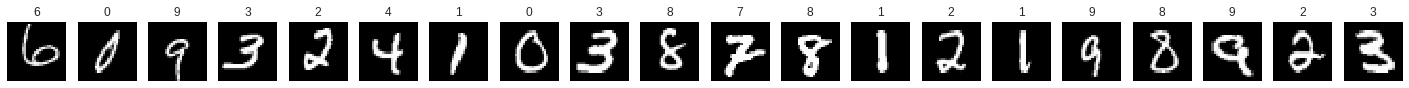

In [4]:


import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(1, 20, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(str(labels[idx].item()))

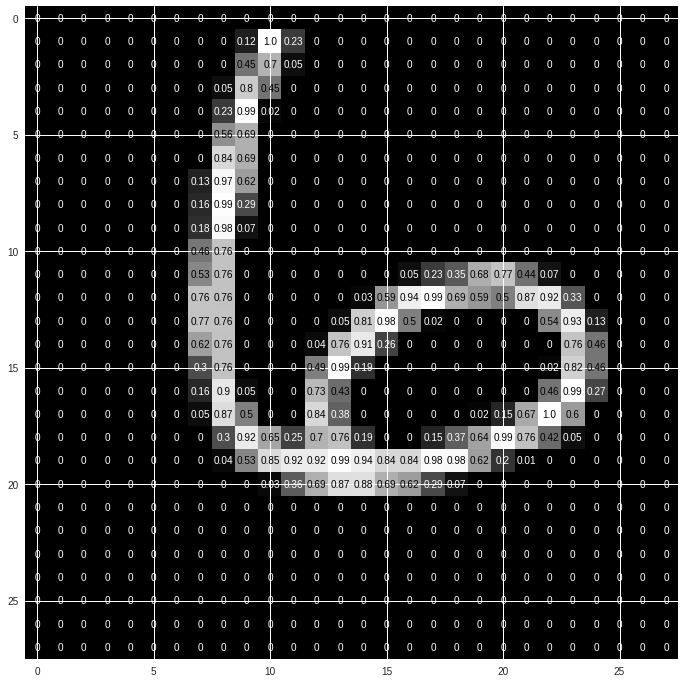

In [5]:
img = np.squeeze(images[0])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    hidden_1 = 512
    hidden_2 = 512
    
    self.fc1 = nn.Linear(28*28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, 10)
    self.dropout = nn.Dropout(0.2)
    
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x
  
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
n_epochs = 50

valid_loss_min = np.inf

for epoch in range(n_epochs):
  train_loss = 0.0
  valid_loss = 0.0
  
  # train the model
  model.train()
  for data, target in train_loader:
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    #backward pass : compute gradient of the loss with respect to model parameters
    loss.backward()
    optimizer.step()
    # update running training loss
    train_loss += loss.item()*data.size(0)
  
  
  # Validate the model
  model.eval()
  for data, target in valid_loader:
    output = model(data)
    loss = criterion(output, target)
    valid_loss += loss.item()*data.size(0)
    
  train_loss = train_loss/len(train_loader.dataset)
  valid_loss = valid_loss/len(valid_loader.dataset)
  
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
  
  if valid_loss <= valid_loss_min:
    print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(
    valid_loss_min,
    valid_loss))
    torch.save(model.state_dict(), 'model.pt')
    valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.773463 	Validation Loss: 0.076664
Validation loss decreased (inf --> 0.076664). Saving model...
Epoch: 2 	Training Loss: 0.288305 	Validation Loss: 0.057453
Validation loss decreased (0.076664 --> 0.057453). Saving model...
Epoch: 3 	Training Loss: 0.225243 	Validation Loss: 0.047772
Validation loss decreased (0.057453 --> 0.047772). Saving model...
Epoch: 4 	Training Loss: 0.188059 	Validation Loss: 0.039818
Validation loss decreased (0.047772 --> 0.039818). Saving model...
Epoch: 5 	Training Loss: 0.159702 	Validation Loss: 0.034623
Validation loss decreased (0.039818 --> 0.034623). Saving model...
Epoch: 6 	Training Loss: 0.140452 	Validation Loss: 0.030490
Validation loss decreased (0.034623 --> 0.030490). Saving model...
Epoch: 7 	Training Loss: 0.123119 	Validation Loss: 0.027003
Validation loss decreased (0.030490 --> 0.027003). Saving model...
Epoch: 8 	Training Loss: 0.110294 	Validation Loss: 0.025054
Validation loss decreased (0.027003 --> 0.025054

In [0]:
#@title Load the Model with the Lowest Validation Loss { vertical-output: true, form-width: "50%", display-mode: "form" }
model.load_state_dict(torch.load('model.pt'))

In [11]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
  output = model(data)
  loss = criterion(output, target)
  
  test_loss += loss.item()* data.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  # compare predictions to true label
  correct = np.squeeze(pred.eq(target.data.view_as(pred)))
  # calculate test accuracy for each object class
  for i in range(batch_size):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1
  
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))


for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
    
    
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.058847

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1128/1135)
Test Accuracy of     2: 97% (1009/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 97% (962/982)
Test Accuracy of     5: 98% (875/892)
Test Accuracy of     6: 98% (941/958)
Test Accuracy of     7: 97% (1000/1028)
Test Accuracy of     8: 97% (952/974)
Test Accuracy of     9: 97% (981/1009)

Test Accuracy (Overall): 98% (9810/10000)


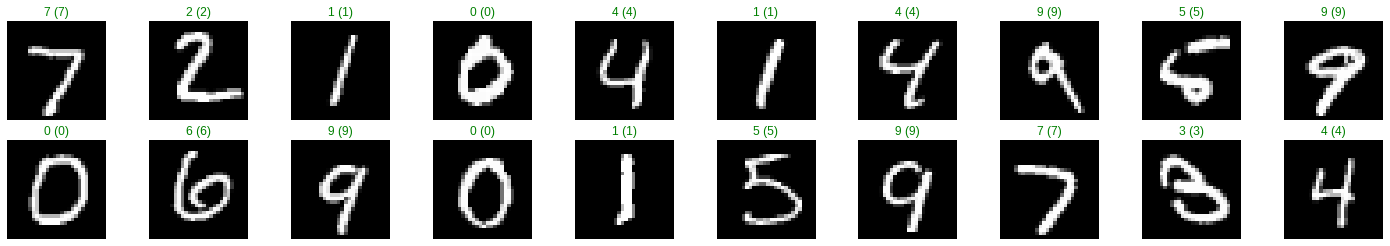

In [12]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))